In [3]:
! pip install ../.

Processing /Users/jhonfelipedelgado/Documents/GitHub/TitanicClassifierCLI
  Preparing metadata (setup.py) ... done
  Created wheel for TitanicClassifierCLI: filename=TitanicClassifierCLI-0.1-py3-none-any.whl size=3297 sha256=1360a6ef8cf16599792768e6a153140c8bdfa55e847cd18f2ea2729b5d85cdd6
  Stored in directory: /private/var/folders/nq/sjxd17ds5nx468zhywxw26280000gn/T/pip-ephem-wheel-cache-1cfimie3/wheels/dc/b6/73/163d3e9c06513a302b7a1eb166969ed80595417d1b38728dda
Successfully built TitanicClassifierCLI
  Attempting uninstall: TitanicClassifierCLI
    Found existing installation: TitanicClassifierCLI 0.1
    Uninstalling TitanicClassifierCLI-0.1:
      Successfully uninstalled TitanicClassifierCLI-0.1


In [4]:
# Import necessary classes from our package
from TitanicClassifierCLI import DataProcessor, ModelTrainer, Evaluator
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
# Load and process the training data
print("Loading and preprocessing training data...")
data_processor = DataProcessor('../Data/train.csv')
data = data_processor.load_data()
data_processor.preprocess()

Loading and preprocessing training data...


In [7]:
# Separate features and target
print("Separating features and target...")
X = data.drop('Survived', axis=1)
y = data['Survived']


Separating features and target...


In [8]:
# Split data into training and test sets
print("Splitting data into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
print("Training the model...")
model_trainer = ModelTrainer()
model_trainer.train(X_train, y_train)


Splitting data into training and test sets...
Training the model...


In [9]:
# Evaluate the model
print("Evaluating the model on test set...")
evaluator = Evaluator(model_trainer.model)
print("Test set results:")
evaluator.evaluate(X_test, y_test)


Evaluating the model on test set...
Test set results:
Accuracy: 0.82


Plotting feature importance...


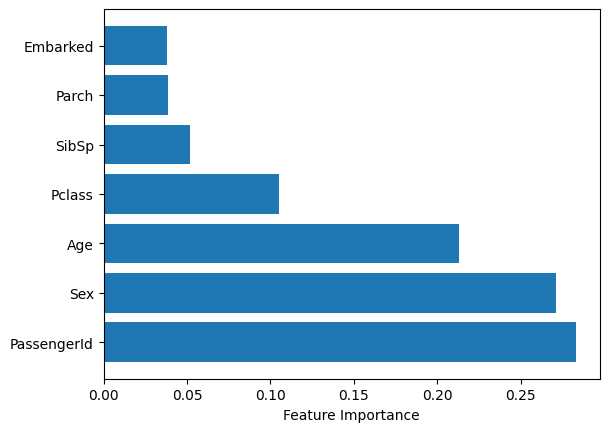

Loading and preprocessing test data...


In [11]:
# Visualize feature importance
print("Plotting feature importance...")
evaluator.plot_importances(X.columns)

# Make predictions on new data
print("Loading and preprocessing test data...")
data_processor_test = DataProcessor('../Data/test.csv')
test_data = data_processor_test.load_data()
data_processor_test.preprocess()

In [12]:
print("Making predictions on test data...")
predictions = model_trainer.predict(test_data)
print("First 10 predictions for the test set:")
print(predictions[:10])

# Optional: Save predictions to a CSV file
print("Saving predictions to CSV...")
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})
submission.to_csv('submission.csv', index=False)
print("Predictions saved to 'submission.csv'")

print("Process completed successfully!")

Making predictions on test data...
First 10 predictions for the test set:
[0 0 0 0 0 0 1 0 0 0]
Saving predictions to CSV...
Predictions saved to 'submission.csv'
Process completed successfully!
